<a href="https://colab.research.google.com/github/dilthara428/Term1-AI-240672B/blob/main/HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the dataset at "/content/Housing.csv" to build a regression model predicting house prices, evaluate its performance, and visualize the results.

## Data loading

### Subtask:
Load the Housing.csv dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset from the specified path into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the data, including checking for missing values, examining distributions, and visualizing relationships between features and the target variable (house price).


**Reasoning**:
Check for missing values, display descriptive statistics, and generate histograms and scatter plots for numerical features and the target variable.



Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Descriptive statistics for numerical columns:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


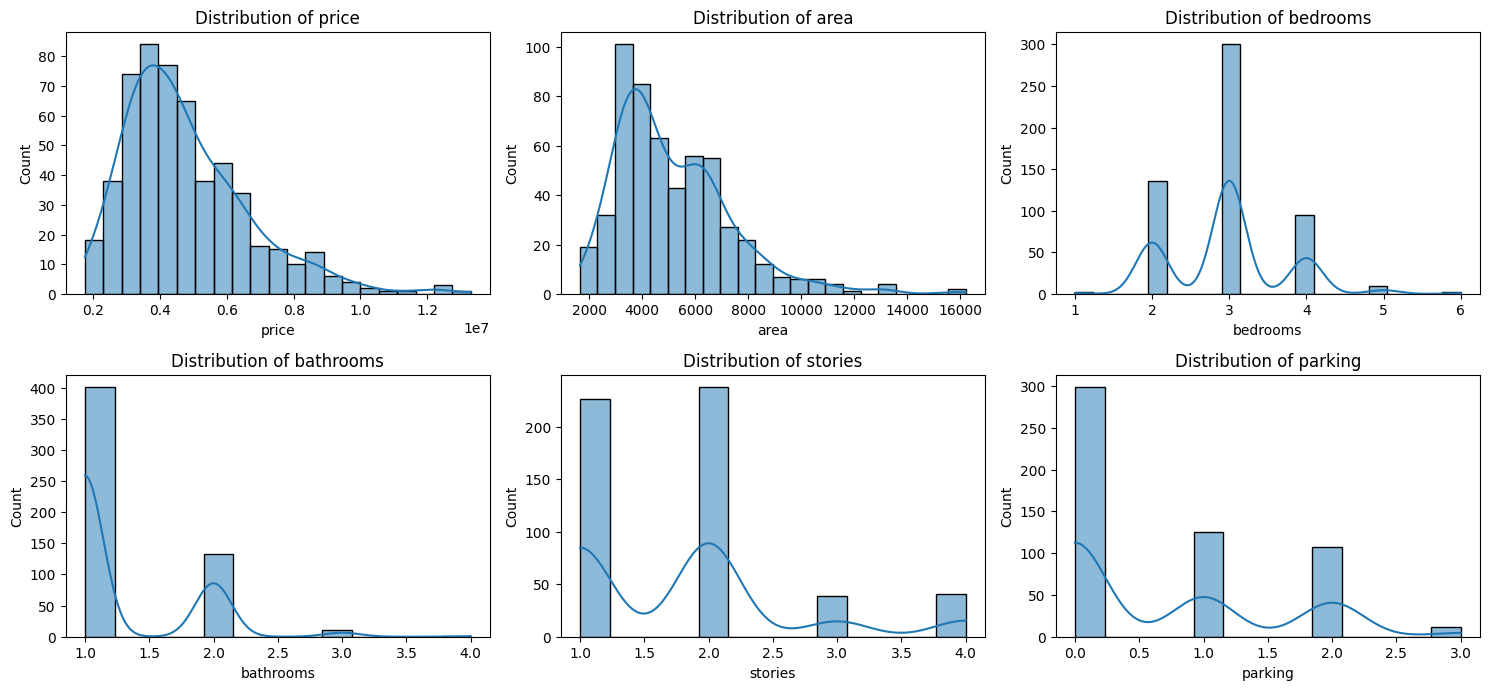

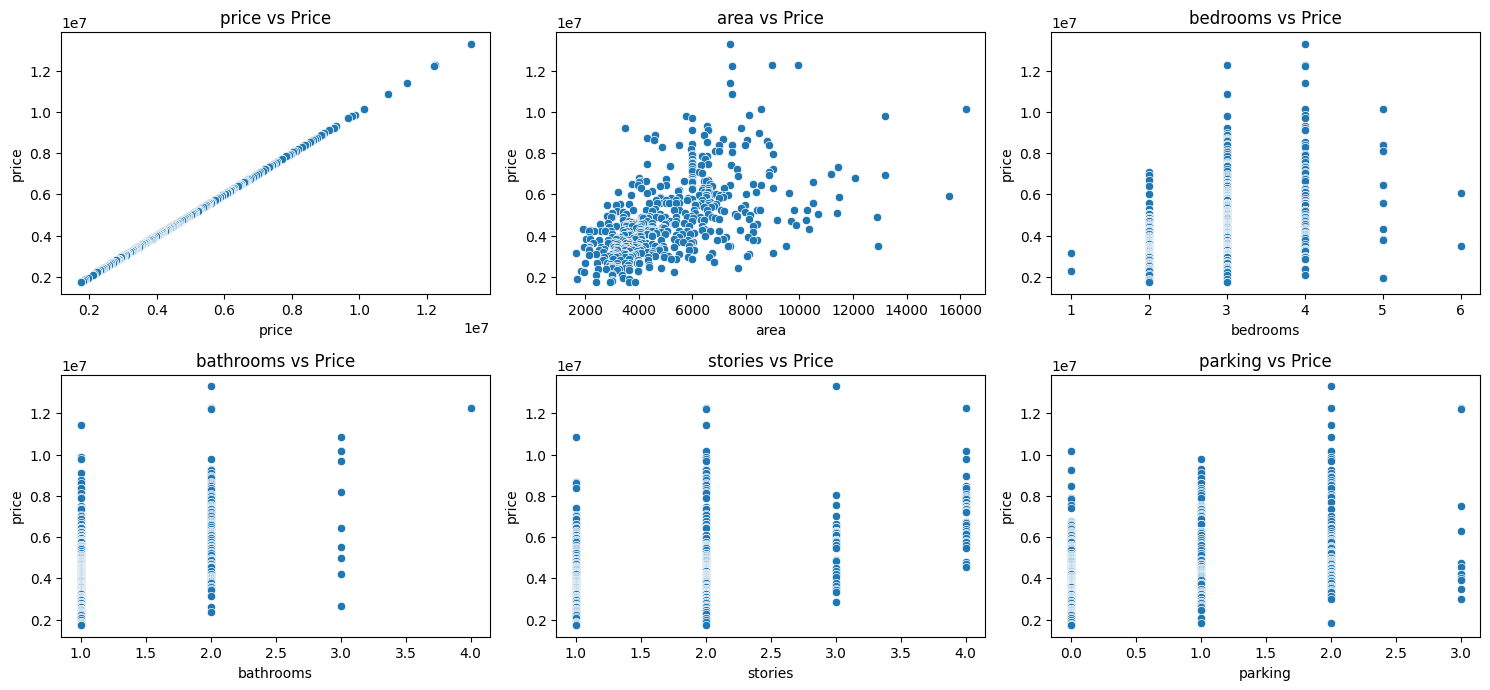

In [2]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for the categorical features against the target variable ('price') to understand how different categories relate to the price.



ValueError: num must be an integer with 1 <= num <= 6, not 7

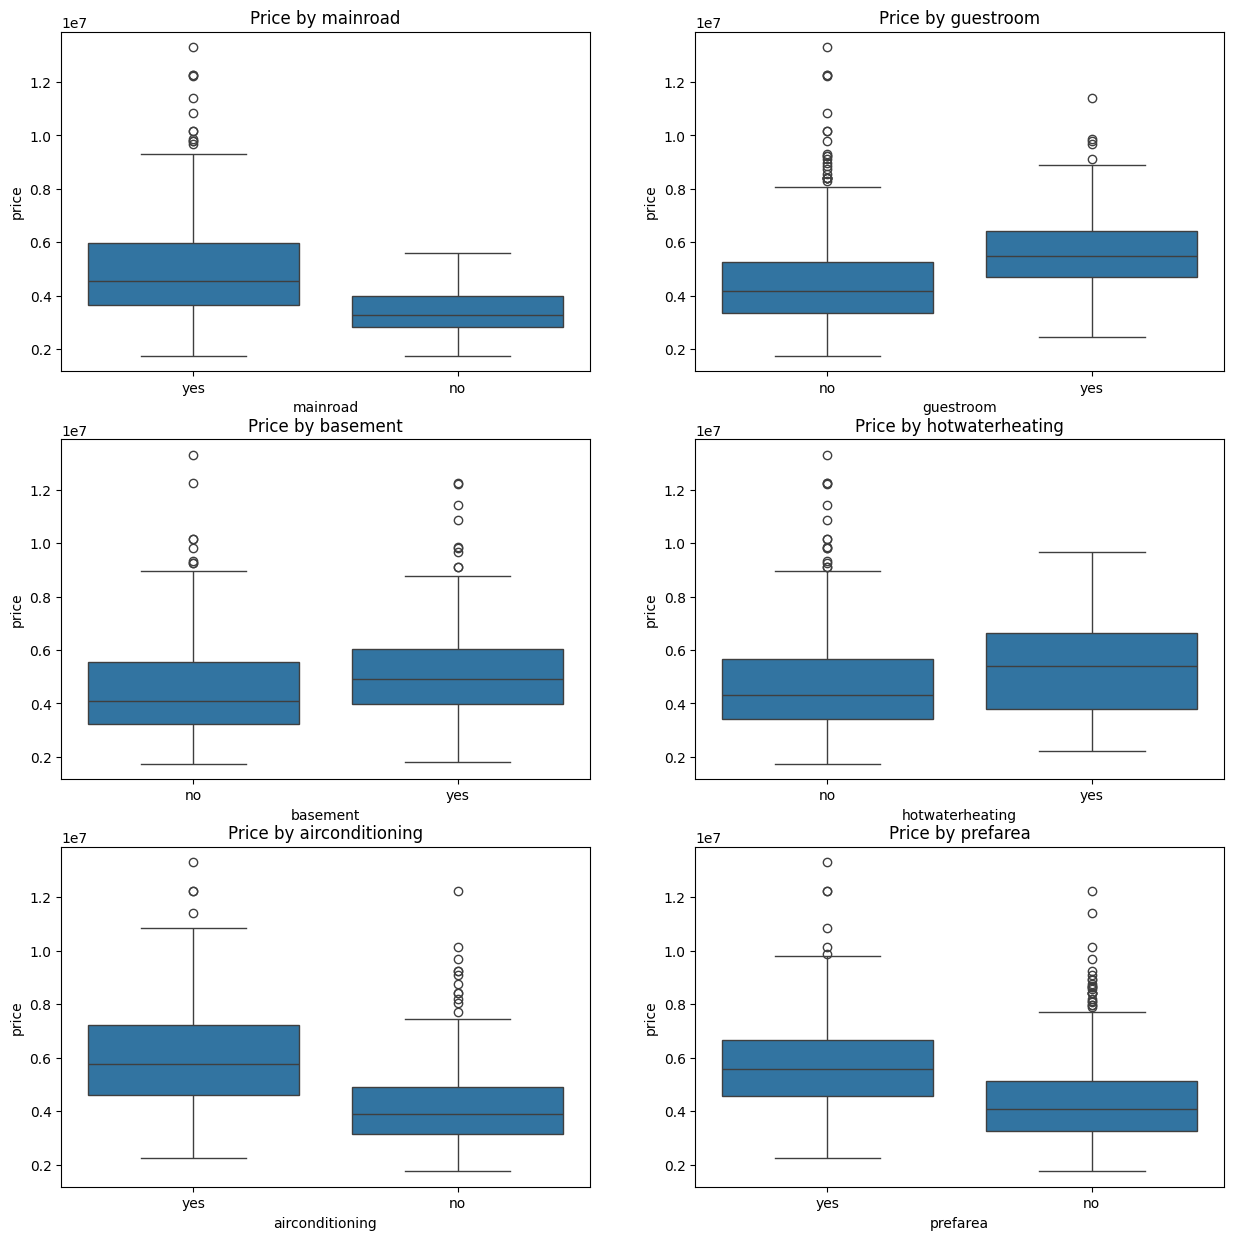

In [3]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Price by {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed because there are more than 6 categorical columns, but the subplot grid was set to 3x2 (6 plots). Adjust the subplot grid to accommodate all categorical columns.



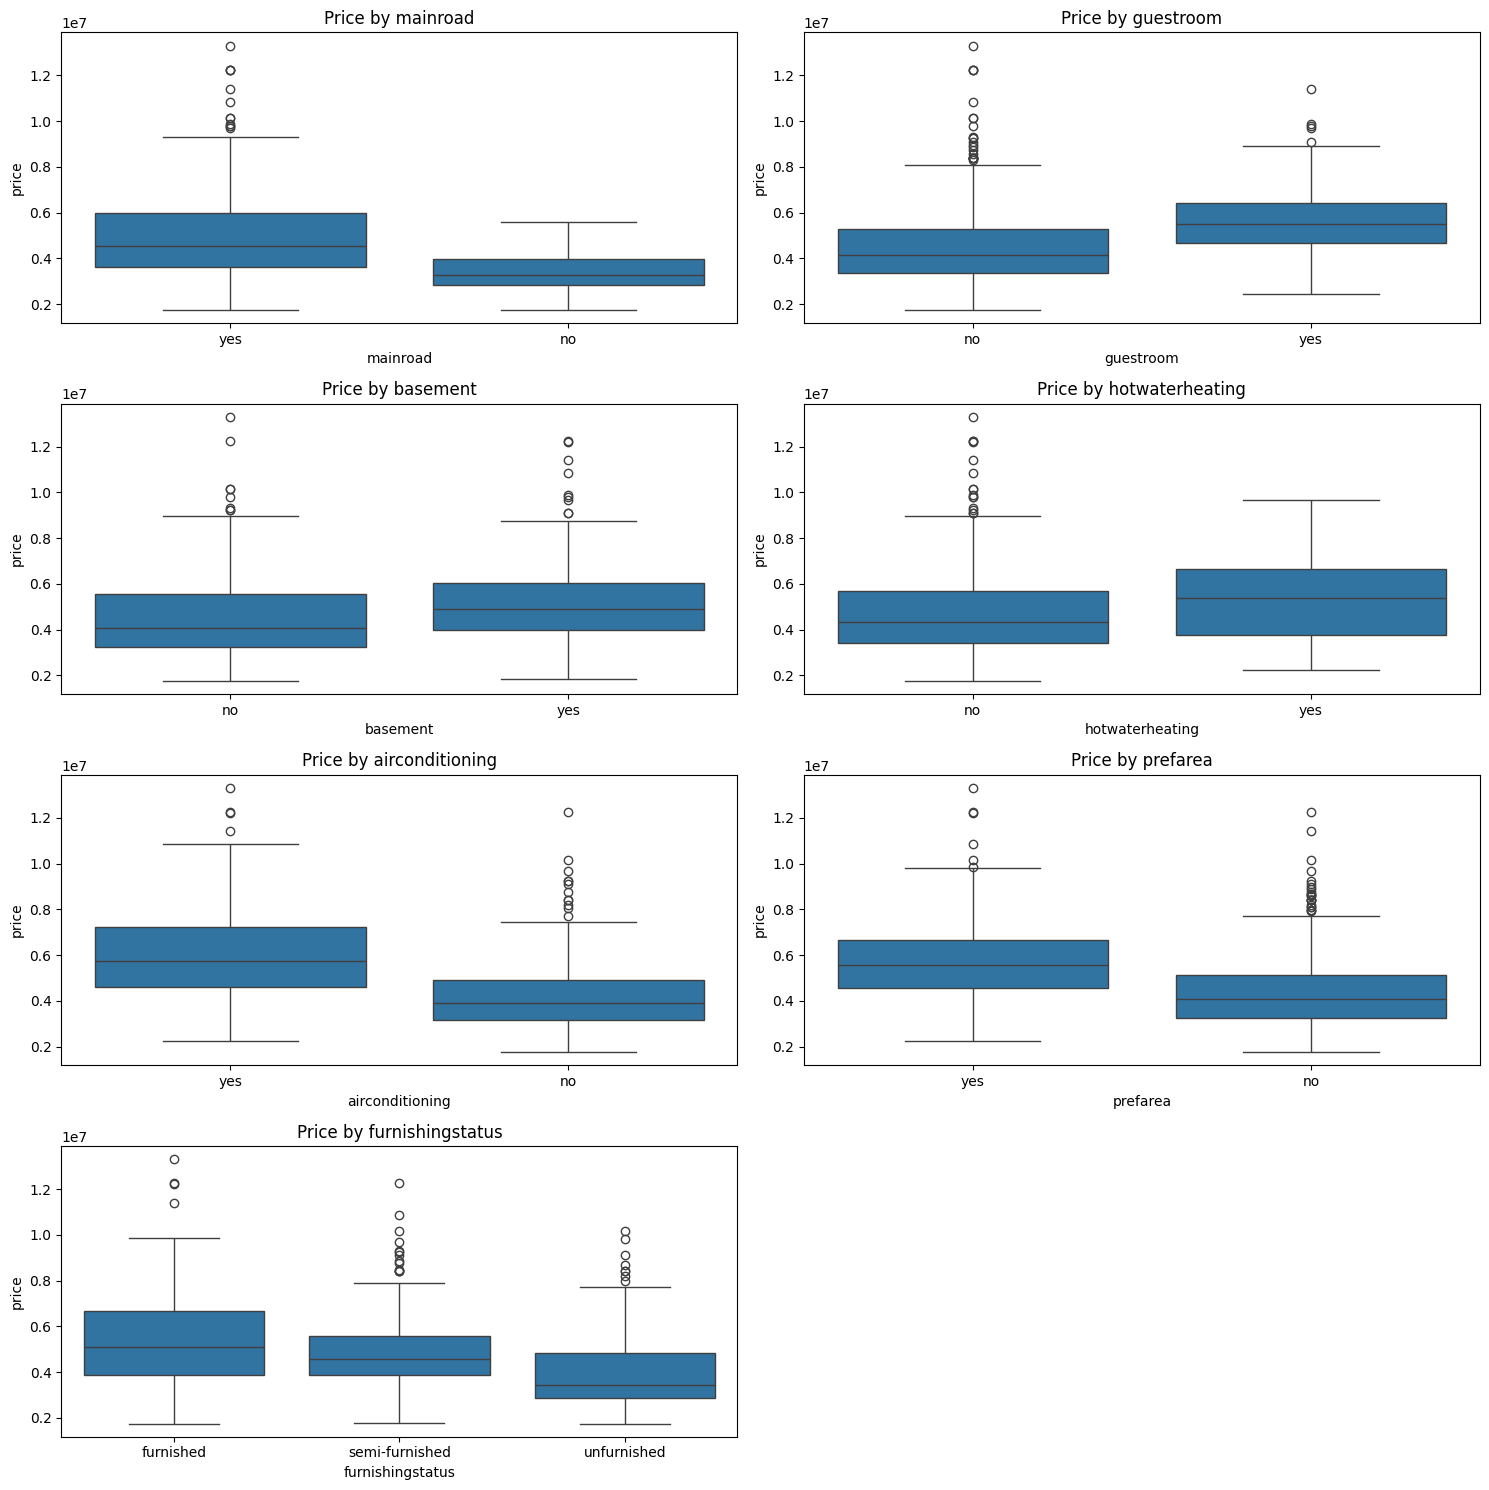

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 15))
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Price by {col}')
plt.tight_layout()
plt.show()

## Data preprocessing

### Subtask:
Handle categorical variables, scale numerical features, and split the data into training and testing sets.


**Reasoning**:
Identify categorical columns, apply one-hot encoding, identify numerical columns, scale numerical features, and split the data into training and testing sets.



In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identify categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Identify numerical columns (excluding the target variable 'price')
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('price')

# Scale the numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Separate features (X) and target variable (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


## Model selection and training

### Subtask:
Choose a regression model (e.g., Linear Regression, Ridge, Lasso, or an ensemble method) and train it on the training data.


**Reasoning**:
Import the Linear Regression model and train it on the training data.



In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained model's performance using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared on the testing data.


**Reasoning**:
Calculate and print the evaluation metrics (MAE, MSE, R-squared) for the trained model on the test data.



In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 970043.4039201644
Mean Squared Error (MSE): 1754318687330.6685
R-squared (R2): 0.6529242642153175


## Visualization

### Subtask:
Visualize the model's predictions against the actual house prices and the residuals to understand the model's performance and identify areas for improvement.


**Reasoning**:
Visualize the actual vs. predicted prices and the residuals to assess model performance.



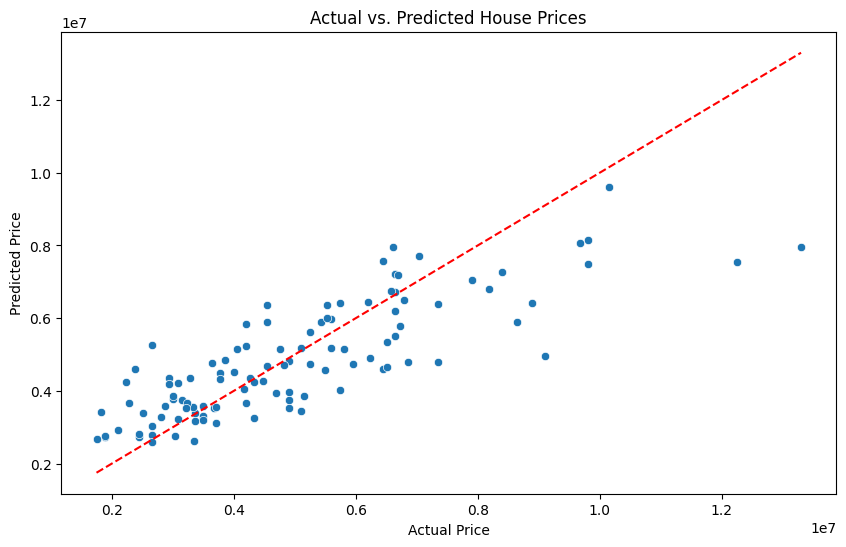

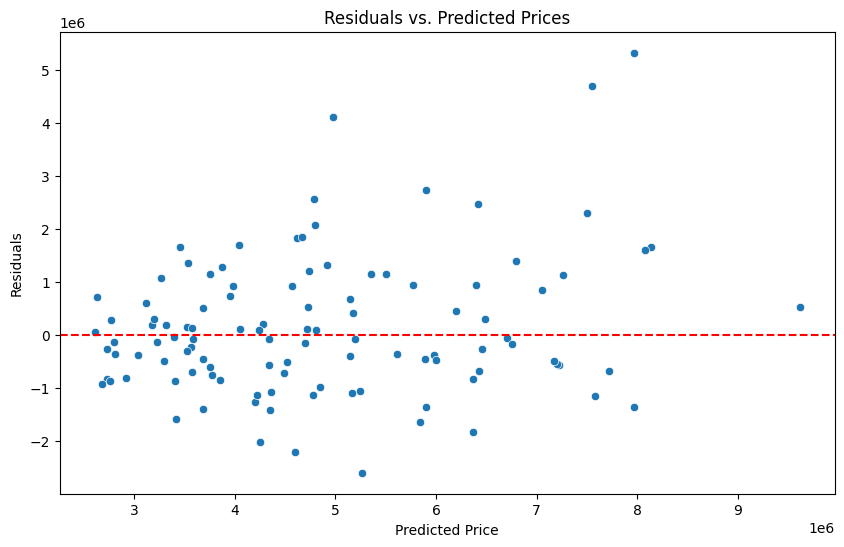

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot comparing actual and predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# Create a scatter plot of residuals vs. predicted prices
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Prices")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains no missing values.
*   Numerical features like 'price' and 'area' show right-skewed distributions.
*   Categorical features such as 'airconditioning' and 'prefarea' appear to be associated with higher house prices.
*   The Linear Regression model achieved an R-squared score of approximately 0.653 on the test data, indicating that about 65.3% of the variance in house prices is explained by the model.
*   The Mean Absolute Error (MAE) of the model is approximately \$970,043.40, representing the average absolute difference between predicted and actual prices.
*   The Mean Squared Error (MSE) is approximately \$1,754,318,687,330.67.
*   Visualizations show a general trend of predicted prices following actual prices, but the residuals plot suggests some heteroscedasticity (non-constant variance of errors) as predicted prices increase.

### Insights or Next Steps

*   Explore alternative regression models (e.g., Ridge, Lasso, or tree-based models) to potentially improve the R-squared score and reduce errors.
*   Investigate the residuals plot further to understand the patterns of errors and consider transformations or more complex models to address potential heteroscedasticity.
